## Titanic - Topic Introduction ##
#### Exploratory Data Analysis (EDA) ####

This is an incredibly important part of any data analysis project. Perhaps understandably, it is also often overlooked - it appears not to get us any closer to a model or solution and can be incredibly time consuming. But time spent here will make our our models much better and our future selves much happier! (After writing this first post I have realised we do very little of this at all, fear not, we will in future posts.)

Below we import various libraries, don't worry if you have not met all of these before (particularly all of the sklearn classifiers) we will explain them all later.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning (sort of!)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

If you have done any data science before, the following will be familiar. Given the dataset is not vast, we can just read in using the pd.read_csv() function. There are some cool and far more performant ways of reading large datasets into pandas which we might explore later.

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


View the head of the DF to check there is nothing too funky going on. We can already see some categorical data (numeric: "Survived" and string: "Sex"). The other thing to note is that "Cabin" has some NaN values that we will have to deal with later! We will use "Sex" now so let's make the catergorical data to a dummy variable. 

In [4]:
for dataset in combine:
    dataset['SexDummy'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

We can have a look at some basic information of the pandas DataFrame using the .info() method. One thing that we should pay particular attention to is the count of variables. There is non-complete data for "Cabin", "Age" and "Embarked" although the latter is only missing 2 data points so we won't lose too much sleep over that. Cabin we will probably not end up using either. From the head of the DataFrame above it doens't look like that will convey much useful information. The missing values in "Age" are a bit more worrying. We will explore methods to impute the missing values from a passenger's other data in a later post, for now however, we will ingore "Age".   

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  SexDummy     891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 87.1+ KB


## Passenger Class and Sex

##### This will be a very simple model using only these two variables

Let's have a look at the survival rate for these various groups (Sex and Pclass)

[Text(0.5, 50.92999999999999, 'Passenger Class')]

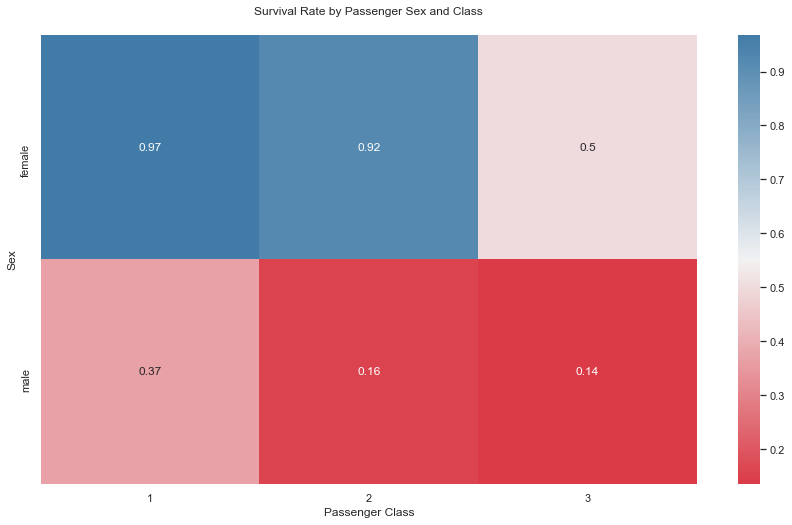

In [6]:
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.set(rc={'figure.figsize':(14.7,8.27)})


df = train_df.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc=np.mean)
ax = plt.axes()
sns.heatmap(df, cmap=cmap, annot=True, ax=ax)
ax.set_title("Survival Rate by Passenger Sex and Class", pad=20)
ax.set(xlabel='Passenger Class')

## So who is most likely to survive? 

Well if you were female and you were in first class (Passenger Class = 1), you had a 97% chance of survival. If you were a male in third class things aren't looking too rosy, this drops all the way down to 14% - quite a remarkable difference. Whilst "Passenger Class" looks to be a very important predictor, you can see that a female, even in third class, was much more likely to survive than any male.

### Fitting the Logistic Regression Model

##### If you are not familar with Logistic Regression there is an earlier post on what it is and why we use it. There are some very good reasons not to use more traditional regression methods like OLS in classification problems like this.

We use Sklearn's test_train_split() to split the dataset into two sections, one that we will use for training our model and one we will use for testing or validating our model. We have split the data using a ration of 1:3 our test dataset is half as big as our train dataset.

Next we instatiate the Logistic Regression model and fit it to our newly created training data. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_df[["Pclass","SexDummy"]], train_df["Survived"], test_size=0.33, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
cf_matrix = confusion_matrix(Y_pred, y_test)

Confusion matrices are a nice way to visualise the performance of your classifier. Most passengers were classified correctly (~78% of them). We had slightly more false positives - 36 passengers - than false negatives - 24 passengers.

[Text(0, 0.5, 'survived'), Text(0, 1.5, 'died')]

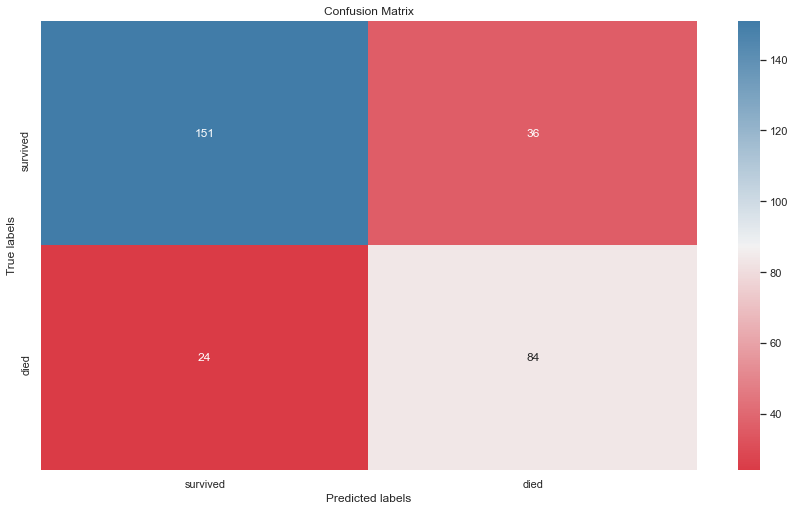

In [10]:
ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, cmap=cmap, fmt="g", ax=ax)
ax.set_title("Confusion Matrix of Predicitons", pad=20)
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['survived', 'died']); ax.yaxis.set_ticklabels(['survived', 'died'])

In [9]:
print(f"Model Accuracy: {acc_log}%" )

Model Accuracy: 78.19%


We'll leave this post here for now and will improve our model later. It's surprising quite how well our model was able to predict survival given only two, very basic descriptor variables. In future posts we will look at extracting hidden data from some variables, imputing missing data and playing around with various models/ensemble techniques. 